In [2]:
from __future__ import division
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For our second example, we're going to look at a problem where regular perturbation fails to give a satisfactory solution.

## Example 3.1.2 Nonlinear oscillations
We consider a modified version of the classic second-order oscillator, modelling a mass on a nonlinear spring
\begin{align}
    m \frac{d^2y}{d\tau^2} &= -ky - ay^3, \quad \tau > 0 \\
    y(0) &= A & \frac{dy}{dt}(0) &= 0
\end{align}
We are considering the case where the nonlinear term is much smaller than the linear term, so we are looking at a perturbed version of the linear problem.

### Rescaling
First, we need to rescale
\begin{equation}
    \begin{aligned}
        [k] &= [M][T]^{-2} & [a] &= [M][L]^{-2}[T]^{-2} & [m] &= [M] & [A] &= [L]
    \end{aligned}
\end{equation}
Obvious choice for $y$ is the initial displacement. Again we look to the linear problem to choose an appropriate timescale. If we neglect this our solution looks like
\begin{equation}
    y(\tau) \sim \cos\left(\sqrt{\frac{k}{m}}\tau + \phi\right)
\end{equation}
So we rescale time by our characteristic time $\sqrt{m/k}$:
\begin{equation}
    \begin{aligned}
        t &= \frac{\tau}{\sqrt{m/k}} & u &= \frac{y}{A}
    \end{aligned}
\end{equation}
Our equation is then
\begin{align}
    \ddot{u} + u + \varepsilon u^3 & = 0 \qquad t > 0 \\
    u(0) &= 1 & \dot{u}(0) &= 0 \\ 
    \varepsilon &= \frac{aA^2}{k} \ll 1
\end{align}
The last expression tells us what is required for the nonlinear term to be truly regarded as smaller than the linear one. This equation is called the Duffing equation.

### Regular perturbation
Let's attempt a regular perturbation solution. We'll make the usual perturbation series approximation
\begin{equation}
    u(t) = u_0(t) + \varepsilon u_1(t) + \varepsilon^2 u_2(t) + \cdots
\end{equation}
This leads to the sequence of equations:
\begin{align}
    \ddot{u}_0 + u_0 &= 0 & u_0(0) &= 1 & \dot{u}_0(0) &= 0 \\
    \ddot{u}_1 + u_1 &= -u_0^3 & u_1(0) &= 0 & \dot{u}_1(0) &= 0\end{align}
The first gives
\begin{equation}
    u_0(t) = \cos t
\end{equation}
And the second then becomes
\begin{equation}
    \ddot{u}_1 + u_1 = -\cos^3 t = -\frac{1}{4}(3 \cos t + \cos 3t)
\end{equation}
Which, after solving becomes
\begin{equation}
    u_1(t) = \frac{1}{32} (\cos 3t - \cos t) - \frac{3}{8} t \sin t
\end{equation}
Giving our first order perturbation approximation as
\begin{equation}
    u_a(t) = \cos t + \varepsilon\left(\frac{1}{32} (\cos 3t - \cos t) - \frac{3}{8} t \sin t\right)
\end{equation}

* Our leading order behaviour is oscillatory (as expected).
* But the correction term is not necessarily small

For fixed $t$, term goes to zero as $\varepsilon \to 0$. But if $t$ is of the order $\varepsilon^{-1}$ or larger, then as $\varepsilon \to 0$, the term $t \sin t$ will be large. This is called a *secular* term.

So the amplitude of the approximate solution will grow with time, and this is certainly not consistent with the physical system. 
* We can't make our correction arbitarily small for $t \in (0, \infty)$ by making $\varepsilon$ small enough
* Additional terms won't help.

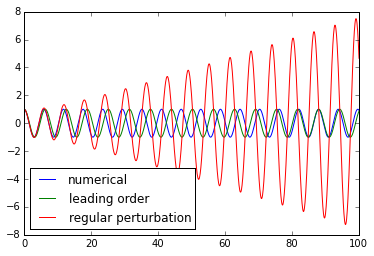

In [7]:
epsilon = 2e-1
t = linspace(0, 100, 1000)
def f(u, t):
    return [u[1], -u[0] - epsilon*u[0]**3]
u0 = [1, 0]
soln = odeint(f, u0, t)

ua0 = cos(t)
ua1 = cos(t) + epsilon*(1/32*(cos(3*t) - cos(t)) - 3/8*t*sin(t))

figure()
ax = gca()
ax.plot(t, soln[:, 0], label='numerical')
ax.plot(t, ua0, label='leading order')
ax.plot(t, ua1, label='regular perturbation')
ax.legend(loc='best')

### The Poincaré-Lindstedt method

The Poincaré-Lindstedt method seeks to overcome the problems inherent with regular perturbation that caused the perturbation approximations to have a different fundamental frequency to the true equation. This causes drift in phase, and also ultimately gives rise to the secular term. The idea behind the method is to also rescale time in a perturbation expansion with the same parameter $\varepsilon$. The hope being that we can eliminate the undesirable behaviour by an appropriate choice of time scale.

So, we rescale our nondimensional time from the previous problem as
\begin{equation}
    \tau = \omega t
\end{equation}
where $\omega = 1 + \varepsilon \omega_1 + \varepsilon^2 \omega_2 + \cdots$ ($w_0 = 1$ to ensure we match the unperturbed problem). Then, substituting into our differential equation, we have 
\begin{align*}
    \omega^2 u'' + u + \varepsilon u^3 &= 0 & \tau > 0 \\
    u(0) &= 0 & u'(0) &= 0
\end{align*}
Substituting our expansion in, we have
\begin{equation*}
    (1 + 2\varepsilon \omega_1 + \cdots) (u_0'' + \varepsilon u_1 '' + \cdots) + (u_0 + \varepsilon u_1 + \cdots) + \varepsilon(u_0^3 + e\varepsilon u_0^2u+1 + \cdots) = 0
\end{equation*}
Then, collecting like terms, we get the problems:
\begin{align}
    \varepsilon^0 &: & u_0'' + u_0 &= 0 & u_0(0) &=1 & u_0'(0) &= 0 \\
    \varepsilon^1 &: & u_1'' + u_1 &= -2\omega_1 u_0'' - u_0^3 & u_1(0) &= 0 & u_1'(0) &= 0
\end{align}
Similar to previously, we have $u_0(\tau) = \cos \tau$. So
\begin{equation}
    u_1'' + u_1 = 2\omega_1 \cos \tau - \cos^3 \tau = \left(2\omega_1 - \frac{3}{4}\right) \cos \tau - \frac{1}{4}\cos 3\tau
\end{equation}
Notice that the $\cos\tau$ term in the right hand side is a solution to the homogeneous problem, and it is this term that gives rise to the secular term. But, if we choose $\omega_1 = \frac{3}{8}$, this issue goes away:
\begin{equation}
    u_1'' + u_1 = -\frac{1}{4}\cos 3\tau
\end{equation}
which, coupled with the initial conditions has solution $u_1(\tau) = \frac{1}{32}\cos 3\tau - \cos \tau$. So our new approximation is
\begin{equation}
    u(\tau) \approx \cos \tau + \frac{1}{32}\varepsilon (\cos 3\tau - \cos \tau),\qquad \tau = t + \frac{3}{8}\varepsilon t
\end{equation}
This approximation is plotted below


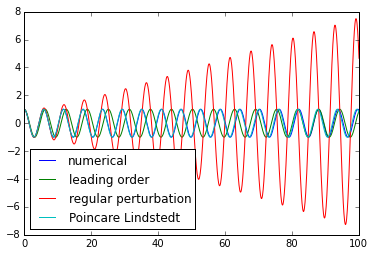

In [8]:
tau = t + 3/8 * epsilon * t
ua2 = cos(tau) + 1/32 * epsilon * (cos(3*tau) - cos(tau))
figure()
ax = gca()
ax.plot(t, soln[:, 0], label='numerical')
ax.plot(t, ua0, label='leading order')
ax.plot(t, ua1, label='regular perturbation')
ax.plot(t, ua2, label='Poincare Lindstedt')
ax.legend(loc='best')